
# Задание 1: Сравнение методов линейной регрессии и тд

Используя созданные ранее наборы данных реализуйте для них следующие регрессионные методы:

• простая линейная регрессия через метод наименьших квадратов sklearn.linear_model.LinearRegression;

• простая линейная регрессия через градиентный спуск sklearn.linear_model.SGDRegressor;

• регрессия с регуляризацией Тихонова sklearn.linear_model.Ridge;

• регрессия с L1-регуляризацией sklearn.linear_model.Lasso;

• эластичная регуляризация sklearn.linear_model.ElasticNet.

Оцените экспериментально оптимальные значения параметра регуляризации для регуляризованных методов.

Постройте кривые обучения для всех методов.

Сделайти выводы.

## Набор make_wave

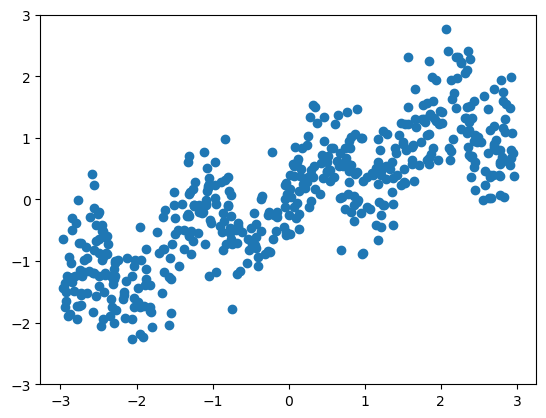

In [1]:
#используемый набор данных 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet)
from sklearn.metrics import mean_squared_error

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = np.sin(4 * x) + x
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.show()


## Метод 1: Обычная линейная регрессия (LinearRegression)

Метод основан на аналитическом решении задачи минимизации ско. Быстро и точно подходит для простых зависимостей.

На данных функции make_wave линейная модель выявляет тренд `y ≈ 0.47x`, при этом ошибки на обучении и тесте близки.


In [2]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f"LinearRegression: w = {lr.coef_[0]:.4f}, b = {lr.intercept_:.4f}")
print(f"R² (train): {lr.score(X_train, y_train):.3f}, R² (test): {lr.score(X_test, y_test):.3f}")
print(f"MSE (train): {mean_squared_error(y_train, y_pred_train):.3f}, MSE (test): {mean_squared_error(y_test, y_pred_test):.3f}")


LinearRegression: w = 0.4725, b = 0.0348
R² (train): 0.667, R² (test): 0.599
MSE (train): 0.360, MSE (test): 0.362



## Метод 2: Линейная регрессия через град. спуск (SGDRegressor)

Метод реализует итеративное обновление весов с использованием стохастического градиентного спуска. Имеет смысл использовать на больших данных.


In [3]:

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=0).fit(X_train, y_train)
print(f"SGDRegressor: w = {sgd.coef_[0]:.4f}, b = {sgd.intercept_[0]:.4f}")
print(f"R² (train): {sgd.score(X_train, y_train):.3f}, R² (test): {sgd.score(X_test, y_test):.3f}")
print(f"MSE (train): {mean_squared_error(y_train, sgd.predict(X_train)):.3f}, MSE (test): {mean_squared_error(y_test, sgd.predict(X_test)):.3f}")


SGDRegressor: w = 0.4749, b = 0.0374
R² (train): 0.667, R² (test): 0.598
MSE (train): 0.360, MSE (test): 0.363



## Метод 3: Ridge-регрессия (L2-регуляризация)


Оптимальное значение alpha = 100


In [4]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
best_alpha_ridge = max(alphas, key=lambda a: Ridge(alpha=a).fit(X_train, y_train).score(X_test, y_test))
ridge = Ridge(alpha=best_alpha_ridge).fit(X_train, y_train)
print(f"Ridge (alpha={best_alpha_ridge}): w = {ridge.coef_[0]:.4f}, b = {ridge.intercept_:.4f}")
print(f"R² (train): {ridge.score(X_train, y_train):.3f}, R² (test): {ridge.score(X_test, y_test):.3f}")


Ridge (alpha=100): w = 0.4385, b = 0.0356
R² (train): 0.664, R² (test): 0.606



## Метод 4: Lasso-регрессия (L1-регуляризация)

Добавляет штраф за сумму абсолютных значений весов, может обнулять неважные признаки.

В этом методе alpha стремится к нулю.

In [5]:
best_alpha_lasso = max(alphas, key=lambda a: Lasso(alpha=a, max_iter=10000).fit(X_train, y_train).score(X_test, y_test))
lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000).fit(X_train, y_train)
print(f"Lasso (alpha={best_alpha_lasso}): w = {lasso.coef_[0]:.4f}, b = {lasso.intercept_:.4f}")
print(f"R² (train): {lasso.score(X_train, y_train):.3f}, R² (test): {lasso.score(X_test, y_test):.3f}")


Lasso (alpha=0.1): w = 0.4415, b = 0.0355
R² (train): 0.664, R² (test): 0.606



## Метод 5: ElasticNet-регрессия (смешанная регуляризация)


In [6]:

best_alpha_enet = max(alphas, key=lambda a: ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train).score(X_test, y_test))
enet = ElasticNet(alpha=best_alpha_enet, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)
print(f"ElasticNet (alpha={best_alpha_enet}): w = {enet.coef_[0]:.4f}, b = {enet.intercept_:.4f}")
print(f"R² (train): {enet.score(X_train, y_train):.3f}, R² (test): {enet.score(X_test, y_test):.3f}")


ElasticNet (alpha=0.1): w = 0.4500, b = 0.0354
R² (train): 0.666, R² (test): 0.605



## Кривые обучения

Показывают, как изменяются ошибки модели при увеличении объема обучающей выборки.


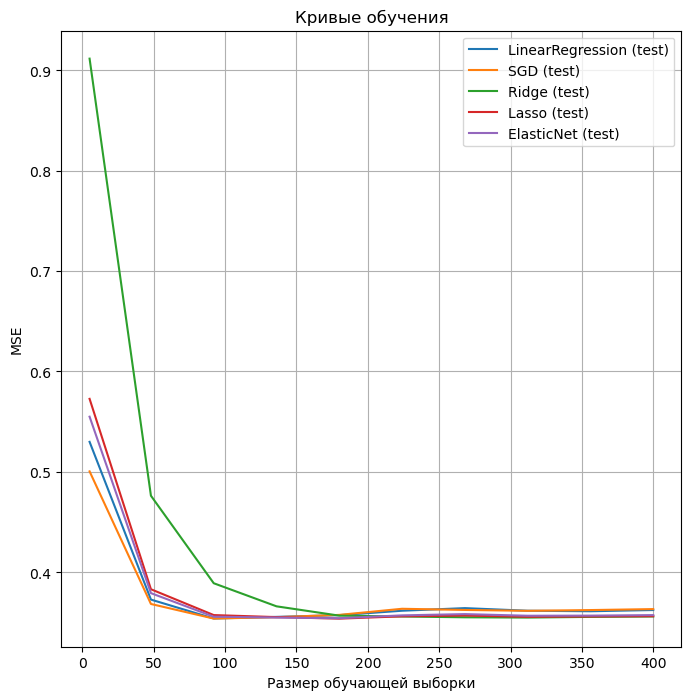

In [7]:

train_sizes = np.linspace(5, len(X_train), 10, dtype=int)
models = {
    "LinearRegression": LinearRegression(),
    "SGD": SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=0),
    "Ridge": Ridge(alpha=best_alpha_ridge),
    "Lasso": Lasso(alpha=best_alpha_lasso, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=best_alpha_enet, l1_ratio=0.5, max_iter=10000)
}

plt.figure(figsize=(8, 8))
for name, model in models.items():
    train_errors, test_errors = [], []
    for m in train_sizes:
        model.fit(X_train[:m], y_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], model.predict(X_train[:m])))
        test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
    plt.plot(train_sizes, test_errors, label=f"{name} (test)")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("MSE")
plt.title("Кривые обучения")
plt.legend()
plt.grid(True)
plt.show()


# Задание 2: Классификация на различных наборах данных

1. Генерация линейно разделимых и неразделимых данных. Проверка Perceptron и LogisticRegression.
2. Генерация концентрических кругов и иньян. Применение полиномиальных признаков.
3. Генерация мультиклассовых данных (линейно разделимых и нет).
4. Сравнение классификаторов: LogisticRegression, Linear SVM, kNN, Soft SVM, RBF SVM, DecisionTree.
5. Выводы о применимости методов.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

def plot_decision_regions(clf, X, y, title=None, ax=None):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    if title:
        ax.set_title(title)


In [9]:
# Генерация данных
X_lin_sep, y_lin_sep = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                             n_clusters_per_class=1, class_sep=2.0, random_state=42)
X_lin_nsep, y_lin_nsep = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                               n_clusters_per_class=1, class_sep=0.5, flip_y=0.1,
                                               random_state=42)
datasets = [(X_lin_sep, y_lin_sep, 'Линейно разделимые'),
            (X_lin_nsep, y_lin_nsep, 'Линейно неразделимые')]


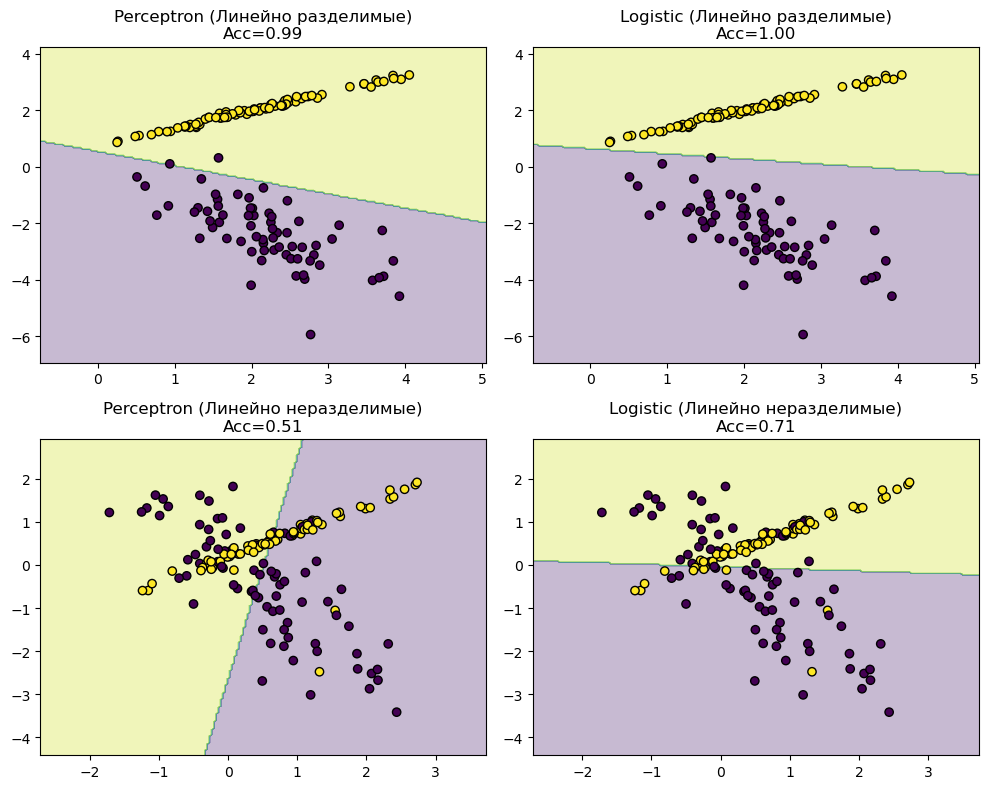

In [10]:
#Проверка Perceptron и LogisticRegression
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for (X, y, label), ax_row in zip(datasets, axes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    # Perceptron
    pct = Perceptron(max_iter=1000, tol=1e-3)
    pct.fit(X_train, y_train)
    y_pred_pct = pct.predict(X_test)
    acc_pct = accuracy_score(y_test, y_pred_pct)
    plot_decision_regions(pct, X_test, y_test, f"Perceptron ({label})\nAcc={acc_pct:.2f}", ax=ax_row[0])
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_log = logreg.predict(X_test)
    acc_log = accuracy_score(y_test, y_pred_log)
    plot_decision_regions(logreg, X_test, y_test, f"Logistic ({label})\nAcc={acc_log:.2f}", ax=ax_row[1])
plt.tight_layout()
plt.show()

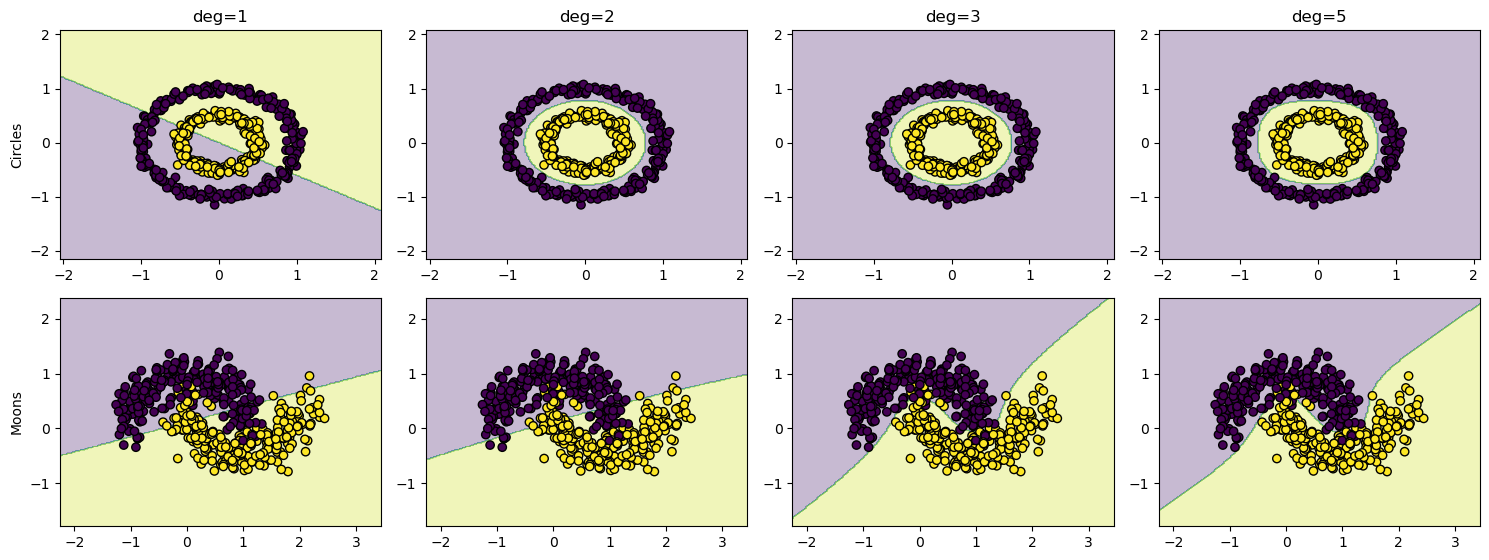

Круги: Degrees [1, 2, 3, 5] -> Accuracies ['0.49', '0.97', '0.97', '0.97', '0.97']
Иньяны: Degrees [1, 2, 3, 5] -> Accuracies ['0.82', '0.85', '0.93', '0.94', '0.96']


In [11]:
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=1) #круги
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=1) #иньяны
datasets_poly = [(X_circles, y_circles, 'Круги'),
                 (X_moons, y_moons, 'Иньяны')]
degrees = [1, 2, 3, 4, 5]
results = {}
for X, y, label in datasets_poly:
    accs = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    for d in degrees:
        model = make_pipeline(PolynomialFeatures(d), StandardScaler(), LogisticRegression(max_iter=1000))
        model.fit(X_train, y_train)
        accs.append(accuracy_score(y_test, model.predict(X_test)))
    results[label] = accs
datasets = {
    "Circles": make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=1),
    "Moons": make_moons(n_samples=500, noise=0.2, random_state=2)
}

degrees = [1, 2, 3, 5]

fig, axes = plt.subplots(len(datasets), len(degrees), figsize=(15, 6))

for row_idx, (name, (X, y)) in enumerate(datasets.items()):
    for col_idx, degree in enumerate(degrees):
        ax = axes[row_idx, col_idx]

        model = make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree),
            LogisticRegression(max_iter=1000)
        )
        model.fit(X, y)

        plot_decision_regions(model, X, y, ax=ax)
        if row_idx == 0:
            ax.set_title(f"deg={degree}")
        if col_idx == 0:
            ax.set_ylabel(name)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

for label, accs in results.items():
    print(f"{label}: Degrees {degrees} -> Accuracies {['{:.2f}'.format(a) for a in accs]}")

In [12]:
# Линейно разделимые мультиклассы
X_mc_sep, y_mc_sep = make_classification(n_samples=600, n_features=2, n_informative=2,
                                           n_redundant=0, n_clusters_per_class=1,
                                           n_classes=3, class_sep=1.5, random_state=0)
# Нелинейно разделимые мультиклассы
X_mc_nsep, y_mc_nsep = make_classification(n_samples=600, n_features=2, n_informative=2,
                                             n_redundant=0, n_clusters_per_class=1,
                                             n_classes=3, flip_y=0.1, class_sep=0.5,
                                             random_state=0)
datasets_mc = [(X_mc_sep, y_mc_sep, 'Multiclass Sep'), (X_mc_nsep, y_mc_nsep, 'Multiclass NonSep')]

In [15]:
#Сравнение методов

classifiers = {
    'Logistic': LogisticRegression(max_iter=1000),
    'Linear SVM': SVC(kernel='linear'),
    'Soft SVM': SVC(kernel='linear', C=0.5),
    'RBF SVM': SVC(kernel='rbf', gamma='scale'),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5)
}
all_datasets = datasets + datasets_poly + datasets_mc
fig_id = 1
for X, y, label in all_datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    n_class = len(np.unique(y))
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()
    for ax, (name, clf) in zip(axes, classifiers.items()):
        model = clf
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        plot_decision_regions(model, X_test, y_test, f"{name}\nAcc={acc:.2f}", ax=ax)
    plt.suptitle(label)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


TypeError: unsupported operand type(s) for +: 'dict' and 'list'

## Выводы
- Персептрон хорошо работает на линейно разделимых данных, хуже на шумных.
- Логистическая регрессия более устойчива к шуму.
- Для нелинейных данных (круги, иньяны) полиномиальные признаки делают лучше.
- RBF-SVM и Decision Tree универсальны, но требуют настройки параметров.
- kNN чувствителен к параметру k
- Для мультиклассовых задач применимы любые методы.